In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn

In [3]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_tt'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

In [4]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_tt'])
print(conn_matrices)

[[[ 1.          0.68051175  0.33386169 ...  0.55005741  0.04173285
    0.38391895]
  [ 0.68051175  1.          0.23386824 ...  0.3398734   0.23853531
    0.22150186]
  [ 0.33386169  0.23386824  1.         ...  0.50772656  0.18255417
    0.56073339]
  ...
  [ 0.55005741  0.3398734   0.50772656 ...  1.         -0.1027891
    0.59681091]
  [ 0.04173285  0.23853531  0.18255417 ... -0.1027891   1.
    0.23417469]
  [ 0.38391895  0.22150186  0.56073339 ...  0.59681091  0.23417469
    1.        ]]

 [[ 1.          0.59950829  0.47520372 ...  0.27901326  0.36031162
    0.26775001]
  [ 0.59950829  1.          0.49833584 ...  0.1527501   0.28411906
    0.1408509 ]
  [ 0.47520372  0.49833584  1.         ...  0.14768518  0.25424427
    0.29413397]
  ...
  [ 0.27901326  0.1527501   0.14768518 ...  1.          0.29661662
    0.47994221]
  [ 0.36031162  0.28411906  0.25424427 ...  0.29661662  1.
    0.51765945]
  [ 0.26775001  0.1408509   0.29413397 ...  0.47994221  0.51765945
    1.        ]]

 [[ 1

<Axes: >

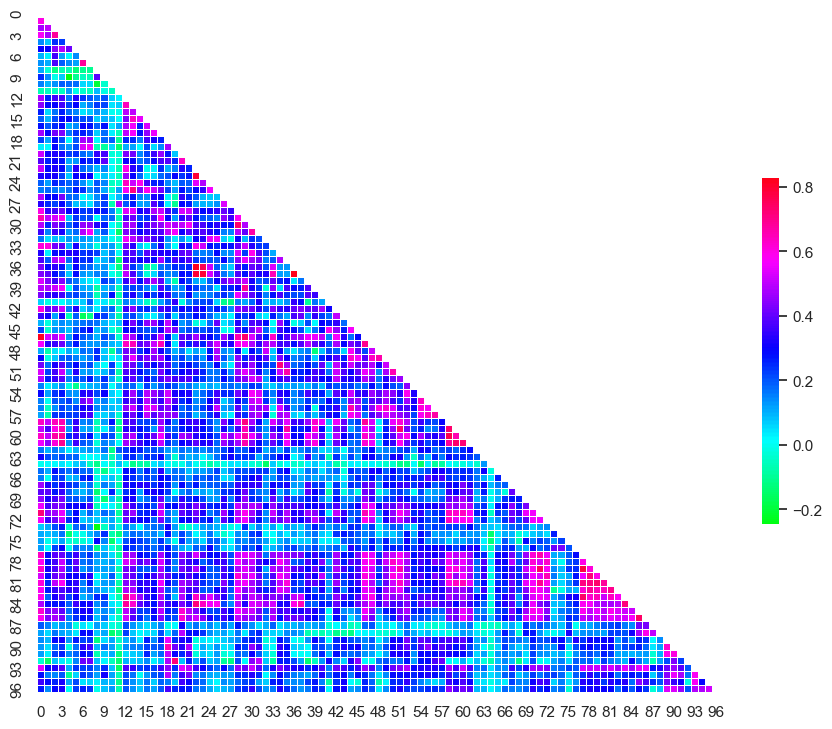

In [5]:
import seaborn as sns

corr = conn_matrices[1]
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='hsv', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# shape of input

print(conn_matrices.shape)

(172, 97, 97)


In [7]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [8]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = y.reshape(y.shape[0], 1)
y = ohe.fit_transform(y).toarray()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Neural network
model = Sequential()
model.add(Dropout(0.8))

# Hidden Layer 1
model.add(Dense(32, input_dim=19900, activation='relu'))
model.add(Dropout(0.8))  # Dropout layer with dropout rate of 0.8

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8)) # Dropout layer with dropout rate of 0.8


# Output Layer
model.add(Dense(2, activation='sigmoid'))  # Use sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
3/3 [==============================] - 2s 17ms/step - loss: 4.4566 - accuracy: 0.4964
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 4.1413 - accuracy: 0.4599
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 5.3461 - accuracy: 0.4599
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 3.8188 - accuracy: 0.5255
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 4.0264 - accuracy: 0.4891
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 3.4392 - accuracy: 0.4891
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 2.7788 - accuracy: 0.5547
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 4.2917 - accuracy: 0.4745
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 4.1489 - accuracy: 0.4380
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 3.9465 - accuracy: 0.4964
Epoch 11/100
3/3 [=

3/3 [==============================] - 0s 10ms/step - loss: 2.1373 - accuracy: 0.5036
Epoch 84/100
3/3 [==============================] - 0s 11ms/step - loss: 2.0589 - accuracy: 0.4964
Epoch 85/100
3/3 [==============================] - 0s 11ms/step - loss: 1.7582 - accuracy: 0.5620
Epoch 86/100
3/3 [==============================] - 0s 11ms/step - loss: 2.0365 - accuracy: 0.5547
Epoch 87/100
3/3 [==============================] - 0s 11ms/step - loss: 1.7460 - accuracy: 0.6350
Epoch 88/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4954 - accuracy: 0.6204
Epoch 89/100
3/3 [==============================] - 0s 11ms/step - loss: 2.0580 - accuracy: 0.5328
Epoch 90/100
3/3 [==============================] - 0s 11ms/step - loss: 2.2029 - accuracy: 0.5693
Epoch 91/100
3/3 [==============================] - 0s 11ms/step - loss: 2.5194 - accuracy: 0.5839
Epoch 92/100
3/3 [==============================] - 0s 12ms/step - loss: 1.9504 - accuracy: 0.5839
Epoch 93/100
3/3 [=====

In [14]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print(pred)
print(test)

2/2 [==============================] - 0s 5ms/step
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [15]:
from sklearn.metrics import accuracy_score,classification_report
a = accuracy_score(pred,test)
report = classification_report(pred, test)
print('Complete Classification Report:\n', report)
print('Accuracy is:', a*100)

# Print individual components

Complete Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.81      0.68      0.74        25

    accuracy                           0.66        35
   macro avg       0.62      0.64      0.62        35
weighted avg       0.70      0.66      0.67        35

Accuracy is: 65.71428571428571


In [16]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [17]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [18]:
from sklearn import svm
from sklearn.model_selection import cross_validate

# Now, as there are various hyperparameters associated with SVM, we will tune it to 
# see which configuration gives the best result

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

C = []
gamma = []

for i in range(-5, 16):
    C.append(2**i)

for i in range(-15, 4):
    gamma.append(2**i)

In [19]:
# Let's start with linear kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='linear', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.000061,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.000122,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.000244,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.000488,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.000977,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.001953,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.003906,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.007812,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916
0.015625,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,...,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916,0.609916


In [20]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [35]:
def Plot3D(df, title):
    X = []
    Y = []
    Z = []
    for i in range(-5, 16):
        for j in range(-15, 4):
            x = 2 ** i
            y = 2 ** j
            z = df[x][y]
            X.append(i)
            Y.append(j)
            Z.append(z)
    newdf = pd.DataFrame({'x': X, 'y': Y, 'z': Z}, index=range(len(X)))
    fig = plt.figure(dpi=400)
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('C (in log scale)')
    ax.set_ylabel('Gamma (in log scale)')
    ax.set_zlabel('Accuracy observed')
    ax.set_title(title)
    ax.plot_trisurf(newdf.x, newdf.y, newdf.z, cmap=cm.magma, linewidth=0.2)
    plt.show()


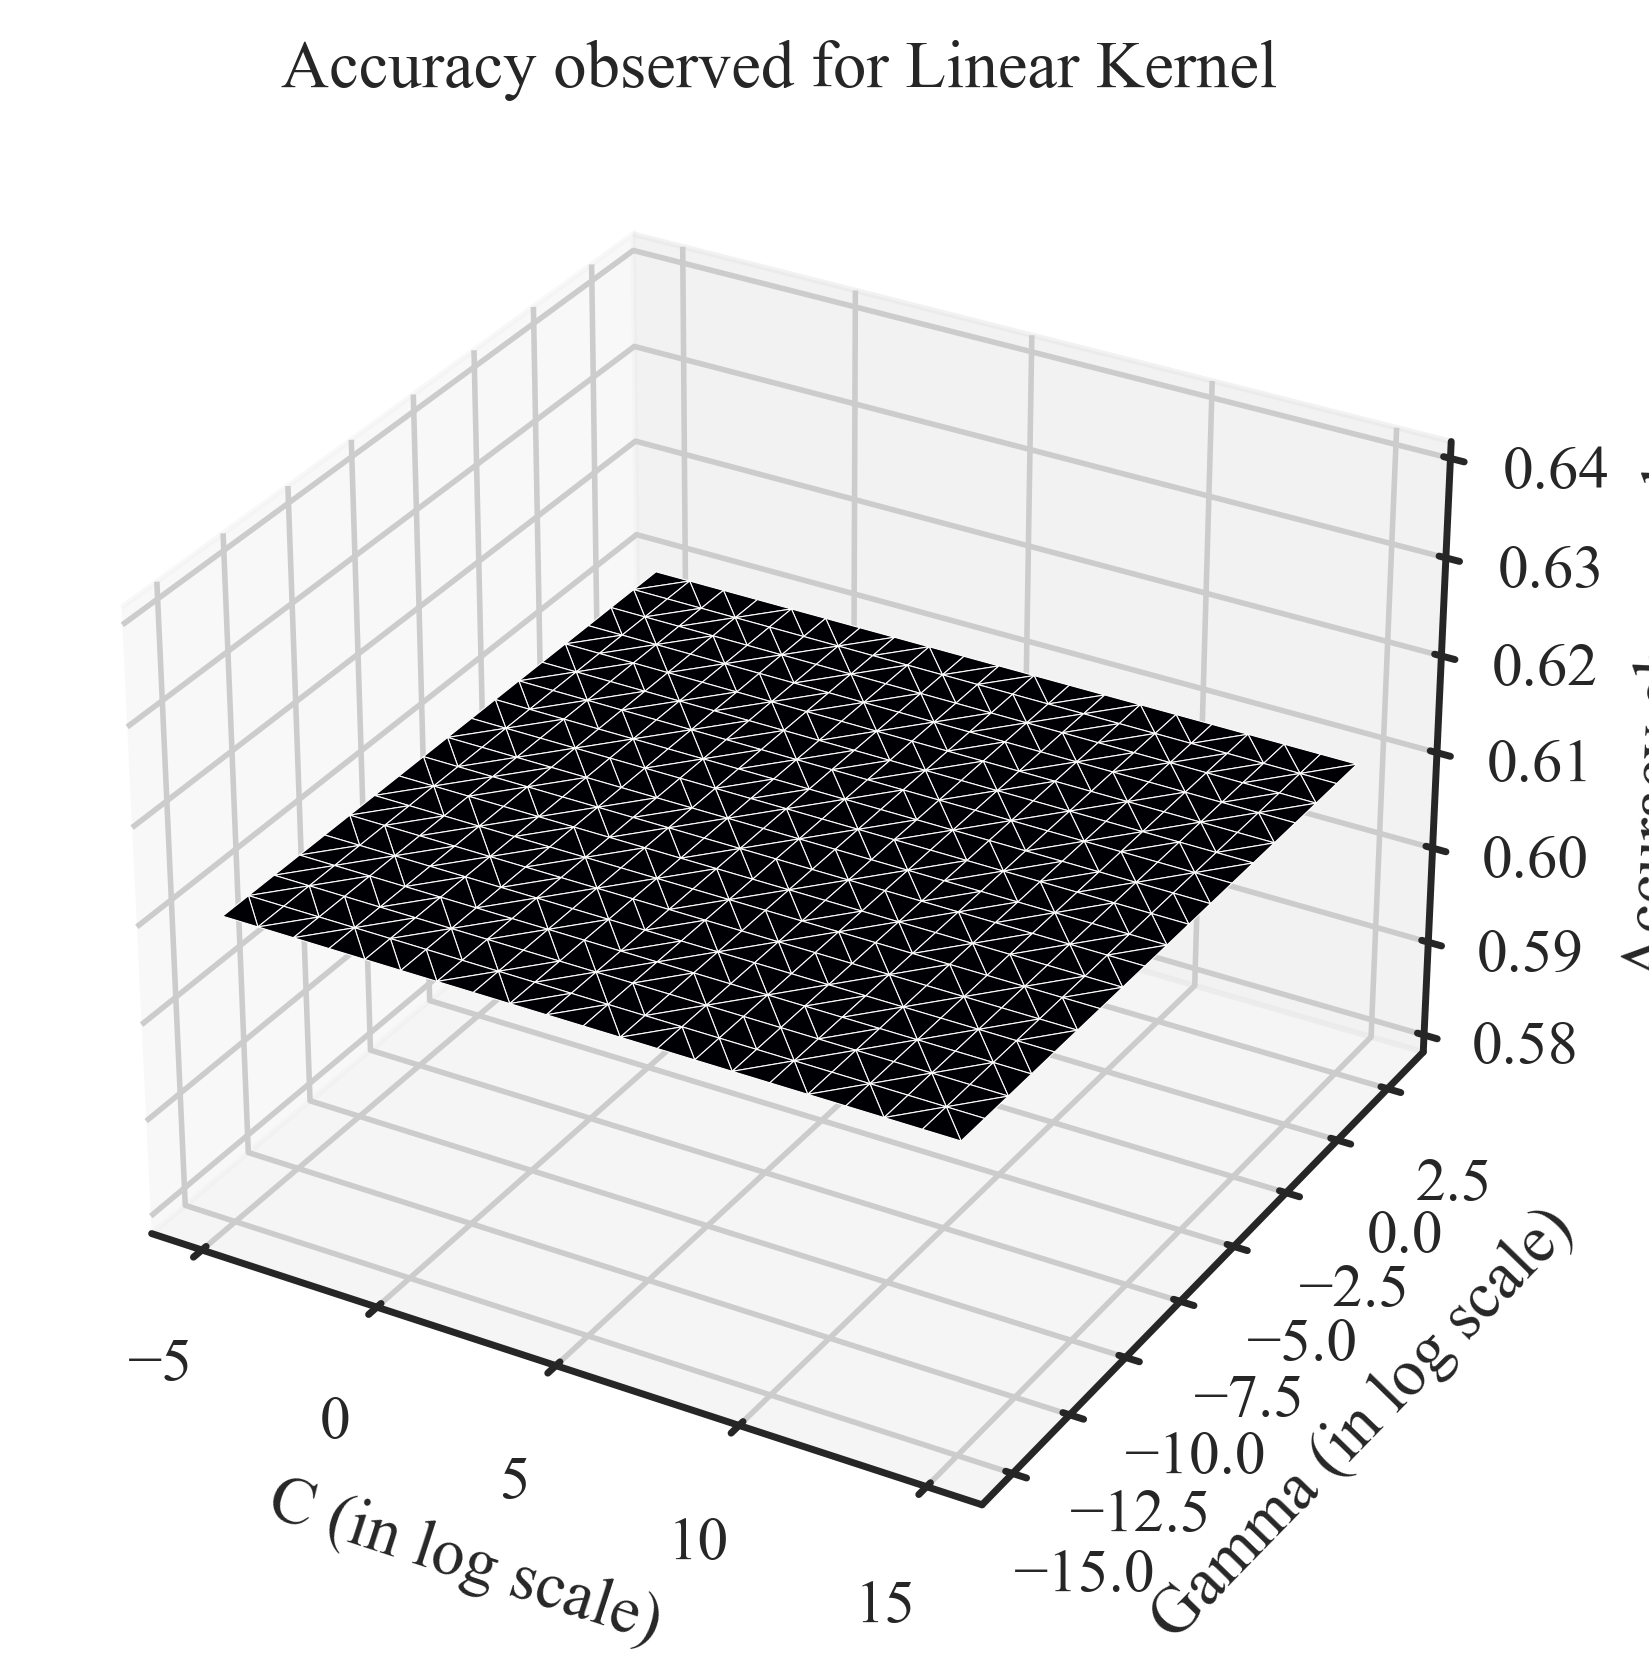

In [36]:
Plot3D(df, 'Accuracy observed for Linear Kernel')

In [37]:
# Using radial kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='rbf', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.489076,0.489076,0.489076,0.489076,0.471429,0.493950,0.569244,0.598487,0.638992,0.615966,...,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966
0.000061,0.465546,0.465546,0.465546,0.465546,0.453782,0.540168,0.610084,0.638992,0.633445,0.639328,...,0.639328,0.639328,0.639328,0.639328,0.639328,0.639328,0.639328,0.639328,0.639328,0.639328
0.000122,0.459664,0.459664,0.459664,0.465546,0.499496,0.592437,0.633277,0.644874,0.638992,0.638992,...,0.638992,0.638992,0.638992,0.638992,0.638992,0.638992,0.638992,0.638992,0.638992,0.638992
0.000244,0.477311,0.477311,0.465546,0.465546,0.534286,0.610252,0.638992,0.644874,0.644874,0.644874,...,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874
0.000488,0.518487,0.518487,0.489076,0.465546,0.465546,0.598655,0.615966,0.615966,0.615966,0.615966,...,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966,0.615966
0.000977,0.489076,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.001953,0.489076,0.489076,0.489076,0.489076,0.489076,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.003906,0.489076,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.007812,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.015625,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748


In [38]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.473596,0.471119,0.468952,0.468023,0.471880,0.569049,0.581265,0.585245,0.586776,0.585874,...,0.585874,0.585874,0.585874,0.585874,0.585874,0.585874,0.585874,0.585874,0.585874,0.585874
std,0.014831,0.013930,0.009053,0.007419,0.018016,0.023097,0.023657,0.028364,0.029738,0.028491,...,0.028491,0.028491,0.028491,0.028491,0.028491,0.028491,0.028491,0.028491,0.028491,0.028491
min,0.459664,0.459664,0.459664,0.465546,0.453782,0.493950,0.569244,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
25%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
50%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
75%,0.483193,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.584118,0.592857,0.592857,...,0.592857,0.592857,0.592857,0.592857,0.592857,0.592857,0.592857,0.592857,0.592857,0.592857
max,0.518487,0.518487,0.489076,0.489076,0.534286,0.610252,0.638992,0.644874,0.644874,0.644874,...,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874,0.644874


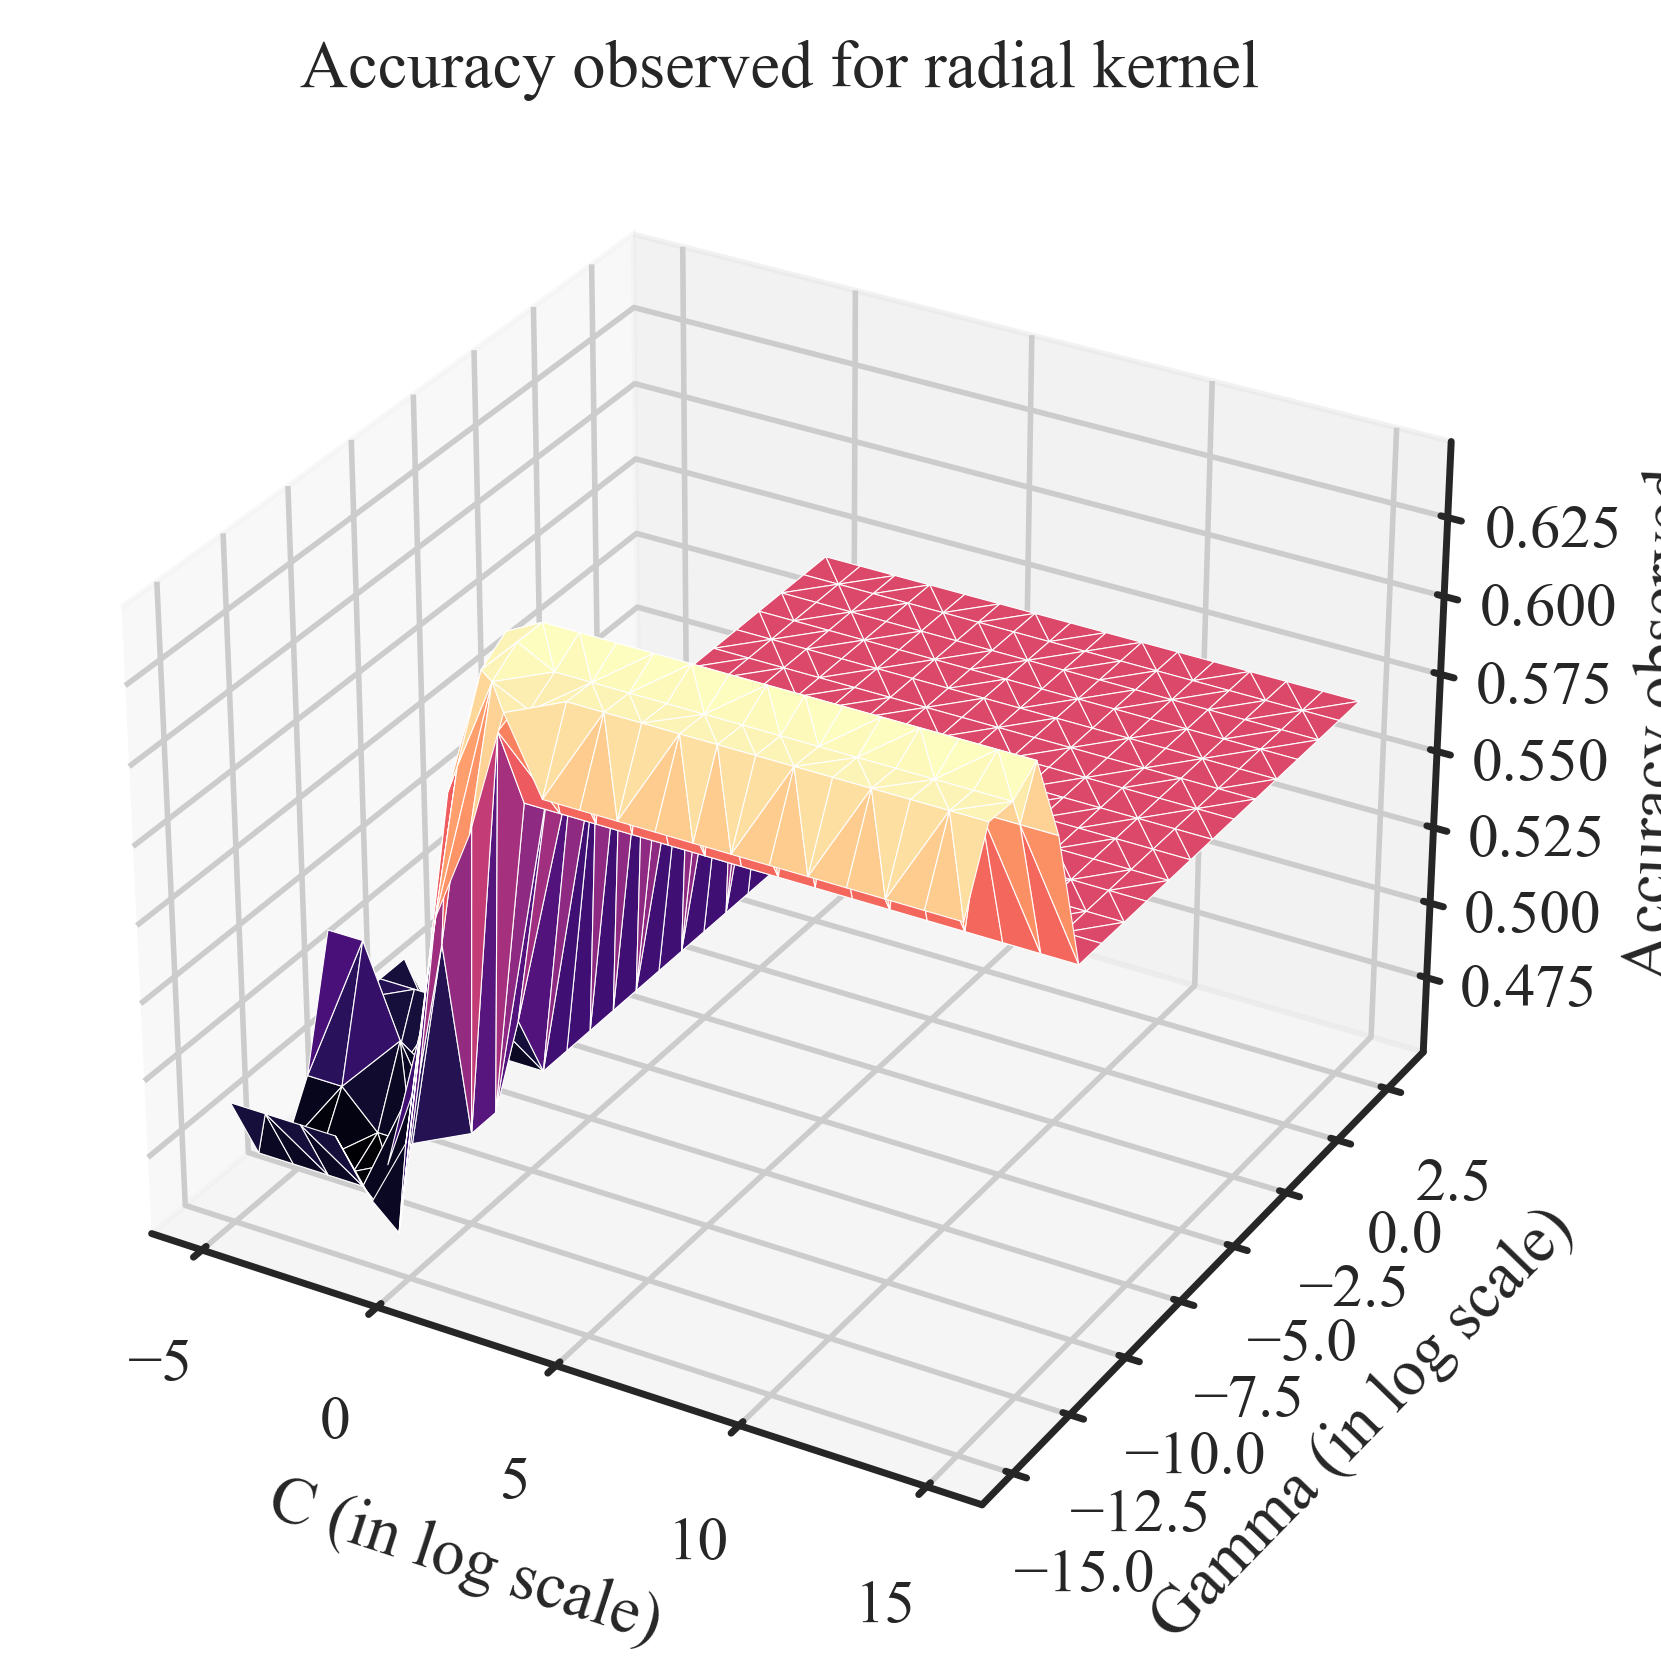

In [39]:
Plot3D(df, 'Accuracy observed for radial kernel')

In [40]:
# Using sigmoid kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='sigmoid', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.489076,0.489076,0.489076,0.489076,0.500840,0.499832,0.522689,0.569076,0.604034,0.627227,...,0.604034,0.575126,0.592269,0.592269,0.592269,0.592269,0.592269,0.592269,0.592269,0.592269
0.000061,0.494958,0.494958,0.494958,0.500840,0.517647,0.528403,0.563025,0.574790,0.592605,0.592269,...,0.579832,0.579832,0.579832,0.585714,0.585714,0.585714,0.585714,0.585714,0.585714,0.585714
0.000122,0.453782,0.453782,0.453782,0.453613,0.528403,0.580672,0.592605,0.552101,0.523025,0.499832,...,0.505882,0.511597,0.505714,0.505714,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
0.000244,0.442017,0.442017,0.436303,0.470420,0.534454,0.563697,0.500336,0.506387,0.500336,0.505882,...,0.494454,0.494454,0.494454,0.494454,0.494454,0.494454,0.494454,0.494454,0.494454,0.494454
0.000488,0.465546,0.471429,0.476471,0.494622,0.551933,0.512101,0.512101,0.494958,0.500840,0.494958,...,0.494958,0.494958,0.494958,0.494958,0.494958,0.494958,0.494958,0.494958,0.494958,0.494958
0.000977,0.465546,0.477143,0.499496,0.540672,0.505882,0.459832,0.483025,0.506387,0.500504,0.494622,...,0.488908,0.483193,0.483193,0.483193,0.483193,0.483193,0.483193,0.483193,0.483193,0.483193
0.001953,0.459664,0.482017,0.470756,0.482185,0.481681,0.511261,0.517311,0.517311,0.499664,0.505378,...,0.528908,0.528908,0.528908,0.528908,0.528908,0.528908,0.528908,0.511261,0.511261,0.528908
0.003906,0.482857,0.470756,0.488067,0.476134,0.481681,0.470252,0.487899,0.493782,0.476303,0.476303,...,0.476303,0.476303,0.476303,0.476303,0.476303,0.476303,0.476303,0.476303,0.476303,0.476303
0.007812,0.505378,0.482521,0.500000,0.511261,0.476639,0.464874,0.464538,0.464370,0.470252,0.482017,...,0.493782,0.493782,0.476134,0.476134,0.476134,0.476134,0.476134,0.476134,0.476134,0.476134
0.015625,0.494118,0.488571,0.505378,0.534454,0.482185,0.499496,0.488067,0.493950,0.476303,0.505378,...,0.499664,0.499664,0.499664,0.499664,0.499664,0.499664,0.499664,0.499664,0.499664,0.499664


In [41]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.484759,0.459390,0.473870,0.501645,0.512579,0.507457,0.506572,0.507581,0.509713,0.513286,...,0.511774,0.510562,0.510226,0.510234,0.509934,0.509934,0.509934,0.509005,0.509314,0.510243
std,0.018713,0.021904,0.022446,0.023474,0.021197,0.031507,0.030517,0.029813,0.036544,0.039283,...,0.034039,0.030760,0.033717,0.034049,0.034116,0.034116,0.034116,0.033810,0.033750,0.034048
min,0.442017,0.424370,0.436303,0.453613,0.476639,0.459832,0.464538,0.464370,0.470252,0.470756,...,0.470756,0.470756,0.470756,0.470756,0.470756,0.470756,0.470756,0.470756,0.470756,0.470756
25%,0.471176,0.441933,0.453109,0.485798,0.500252,0.491008,0.487983,0.490924,0.482521,0.494286,...,0.493866,0.493866,0.488571,0.488571,0.488571,0.488571,0.488571,0.488571,0.488571,0.488571
50%,0.493950,0.453782,0.476471,0.499832,0.517311,0.500336,0.500336,0.505546,0.500504,0.505378,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.497311,0.479580,0.492017,0.519916,0.528571,0.520336,0.517563,0.514706,0.523025,0.514538,...,0.520420,0.520420,0.520420,0.520420,0.520420,0.520420,0.520420,0.511597,0.511597,0.520420
max,0.505546,0.494958,0.505882,0.540672,0.551933,0.580672,0.592605,0.574790,0.604034,0.627227,...,0.604034,0.579832,0.592269,0.592269,0.592269,0.592269,0.592269,0.592269,0.592269,0.592269


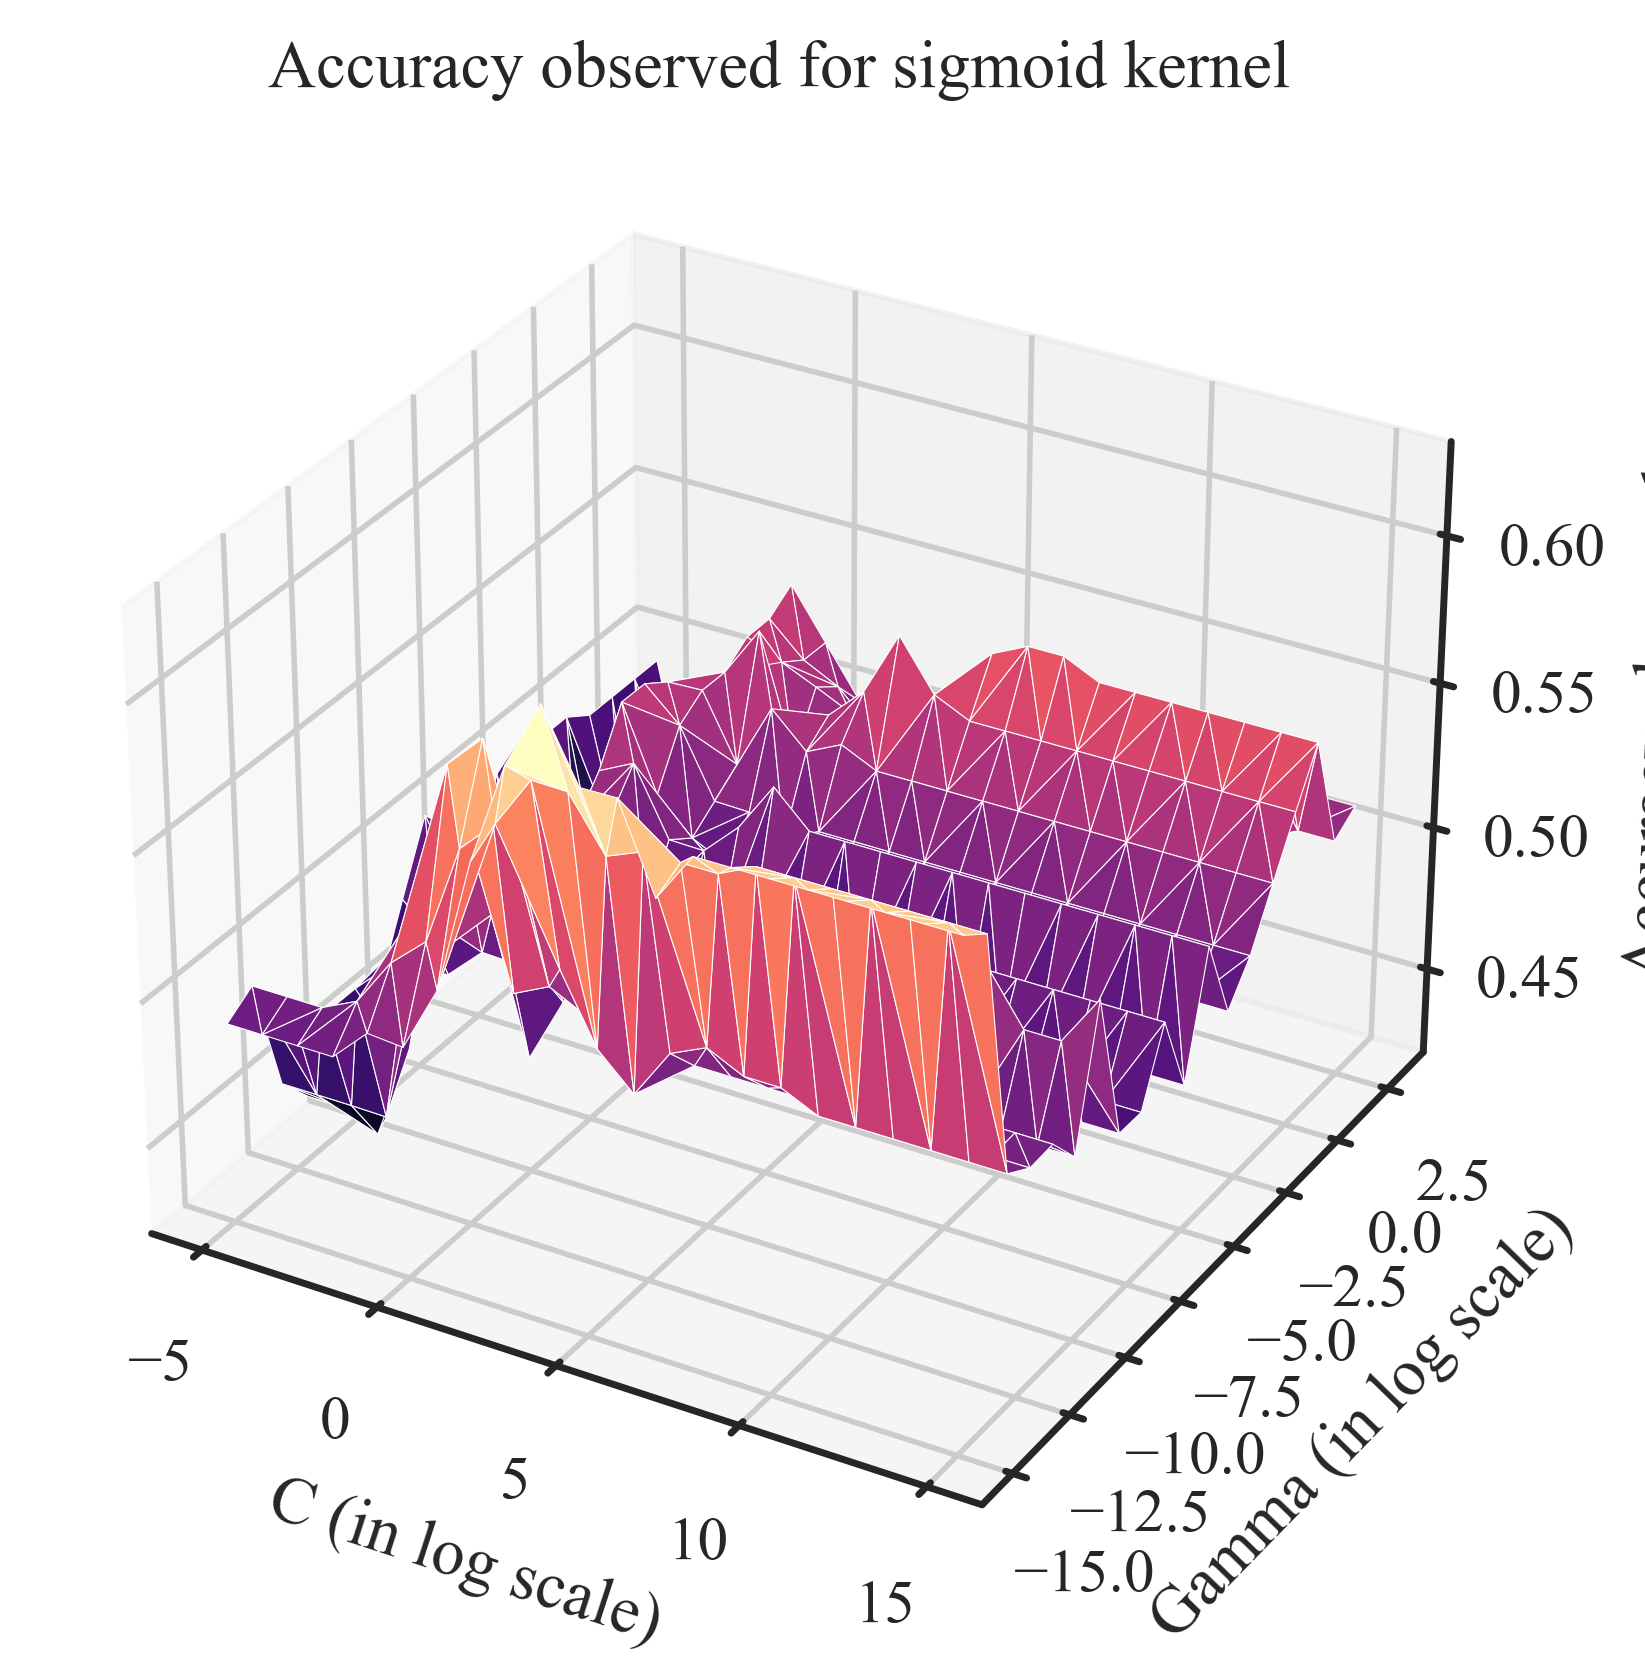

In [42]:
Plot3D(df, 'Accuracy observed for sigmoid kernel')

In [ ]:
# Using quadratic kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='poly', degree=2, gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

In [41]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,0.550341,0.556418,0.556134,0.562211,0.561928,0.568005,0.567722,0.573799,0.572278,0.574427,...,0.575055,0.575020,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01
std,0.044225,0.040652,0.039452,0.034335,0.032959,0.025186,0.023349,0.004349,0.013532,0.003607,...,0.002506,0.002660,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16
min,0.465546,0.465546,0.465546,0.465546,0.465546,0.465546,0.489076,0.563697,0.517815,0.563697,...,0.564706,0.564034,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01
25%,0.540924,0.564202,0.569832,0.570168,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,...,0.575630,0.575630,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01
50%,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,...,0.575630,0.575630,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01
75%,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,0.575630,...,0.575630,0.575630,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01
max,0.581345,0.575630,0.581345,0.575630,0.581345,0.575630,0.581345,0.575630,0.581345,0.575630,...,0.575630,0.575630,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01,5.756303e-01


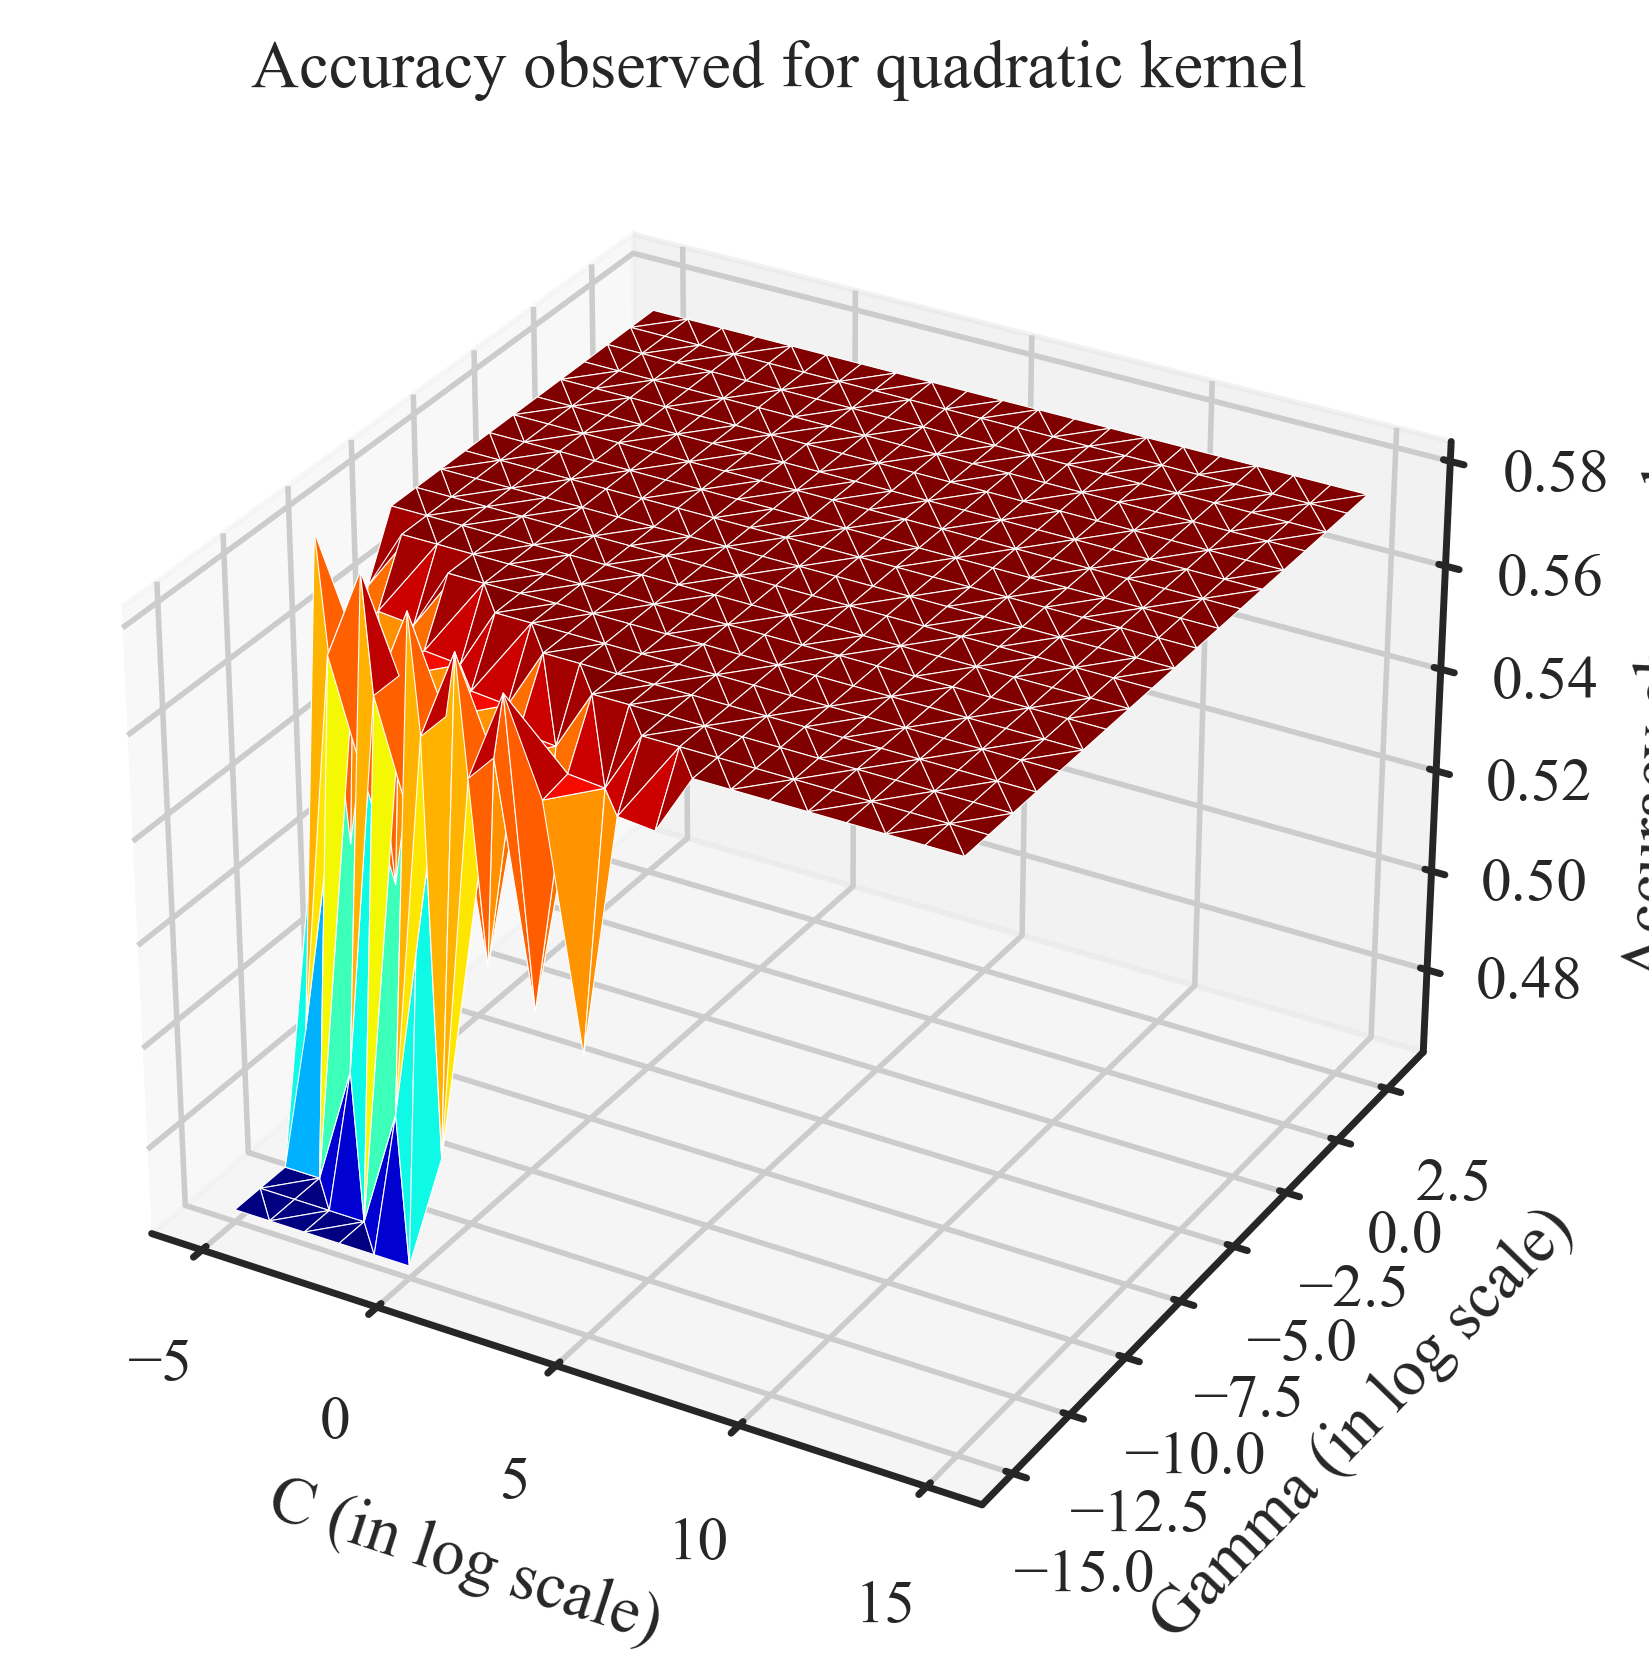

In [42]:
Plot3D(df, 'Accuracy observed for quadratic kernel')